<a href="https://colab.research.google.com/github/MayarAtef16/Default-of-Credit-Card-Clients/blob/main/Default_of_Credit_Card_Clients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Dataset

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mayarabdelhamid1","key":"8c6651a0258d3bee599da39d82c5dd71"}'}

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d uciml/default-of-credit-card-clients-dataset

default-of-credit-card-clients-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! kaggle datasets list

ref                                                              title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                          Most Streamed Spotify Songs 2023                47KB  2023-08-26 11:04:57          10784        351  1.0              
carlmcbrideellis/zzzs-lightweight-training-dataset-target        Zzzs: Lightweight training dataset + target    185MB  2023-09-18 18:16:21            382         53  1.0              
joebeachcapital/students-performance                             Students Performance                             2KB  2023-08-31 00:50:11           3520         92  1.0              
josephinelsy/spotify-top-hit-playlist-2010-2022                  Spotify Top Hit

In [ ]:
!unzip -q /content/default-of-credit-card-clients-dataset.zip -d /content/

replace /content/UCI_Credit_Card.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


# Data Content

There are 25 variables:

- ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit


- SEX: Gender (1=male, 2=female)


- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)


- MARRIAGE: Marital status (1=married, 2=single, 3=others)


- AGE: Age in years


- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)


- PAY_2: Repayment status in August, 2005 (scale same as above)


- PAY_3: Repayment status in July, 2005 (scale same as above)


- PAY_4: Repayment status in June, 2005 (scale same as above)


- PAY_5: Repayment status in May, 2005 (scale same as above)


- PAY_6: Repayment status in April, 2005 (scale same as above)


- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)


- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)


- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)


- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)


- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)


- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)


- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)


- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)


- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)


- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)


- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)


-  PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)


- default.payment.next.month: Default payment (1=yes, 0=no)

#Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

#Data Analysis , Exploration, Visualization

- Read the first 5 rows

In [ ]:
df = pd.read_csv('/content/UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [ ]:
correlation_matrix = df.corr(method='pearson')

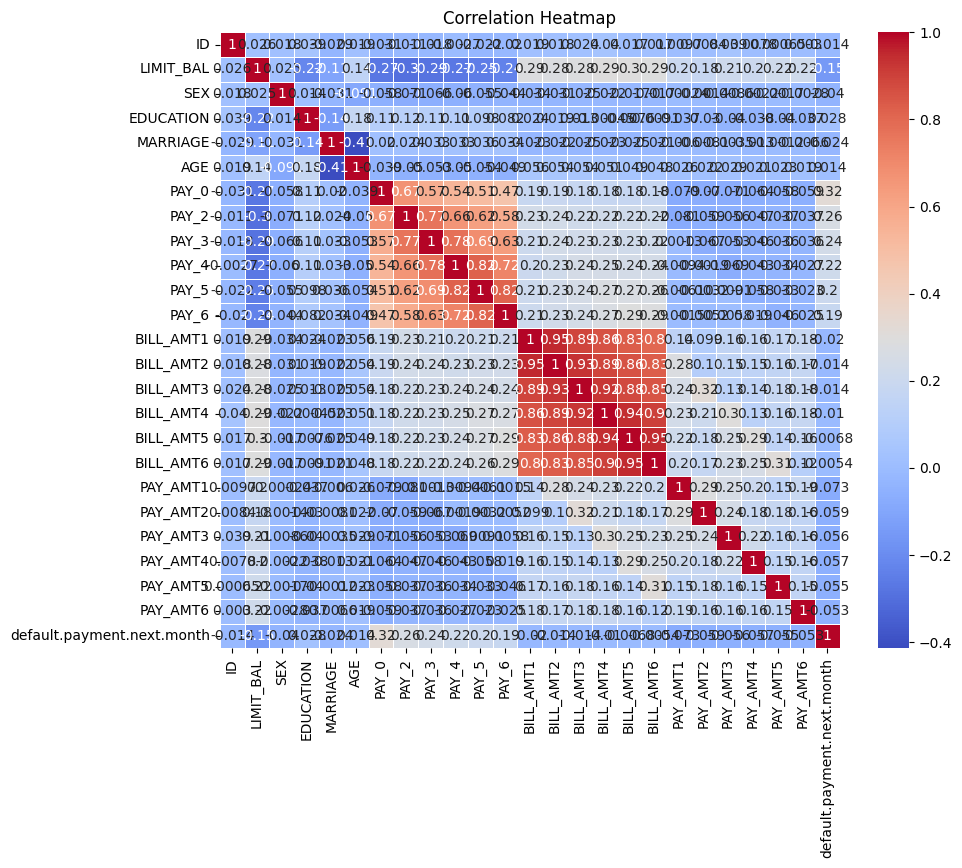

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df.SEX.unique()

array([2, 1])

doesn't have ambiguous data or inconsistent formatting




In [ ]:
df.EDUCATION.unique()

array([2, 1, 3, 5, 4, 6, 0])

5 and 6 represent unknowns; we can drop these cells

In [ ]:
df.MARRIAGE.unique()

array([1, 2, 3, 0])

doesn't have ambiguous data or inconsistent formatting

In [ ]:
df.AGE.unique()

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74])

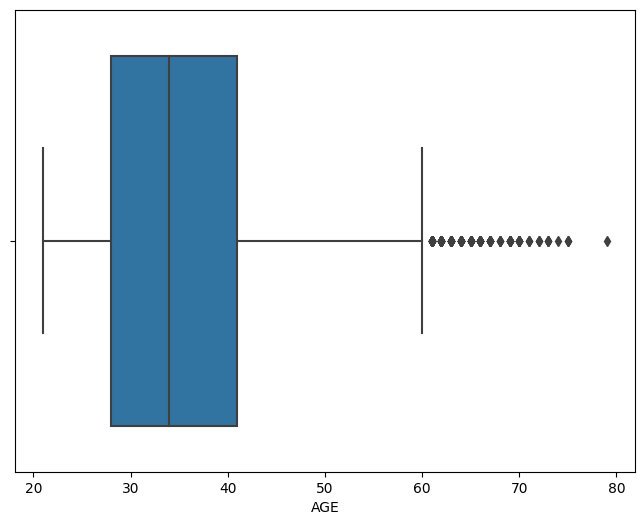

In [ ]:
# Choose the feature you want to create a boxplot for
feature_to_plot = df.AGE
# Create a boxplot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x=feature_to_plot)
plt.show()

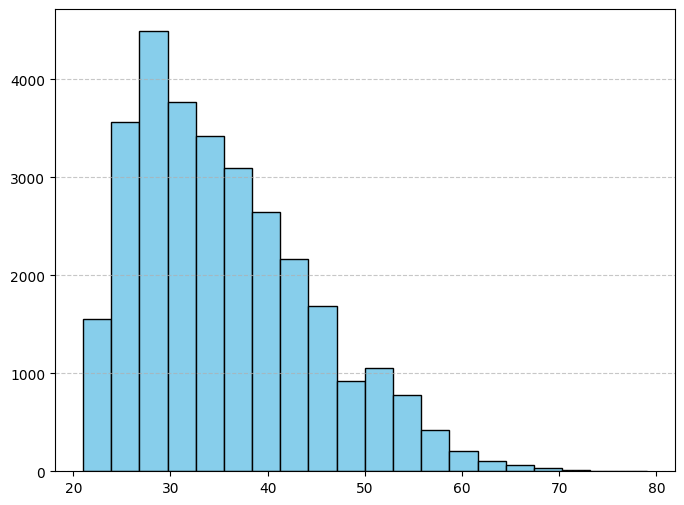

In [ ]:
# Choose the feature you want to create a histogram for
feature_to_plot = df.AGE

# Create a histogram using Matplotlib
plt.figure(figsize=(8, 6))
plt.hist(feature_to_plot, bins=20, color='skyblue', edgecolor='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

normalization can be used for AGE feature

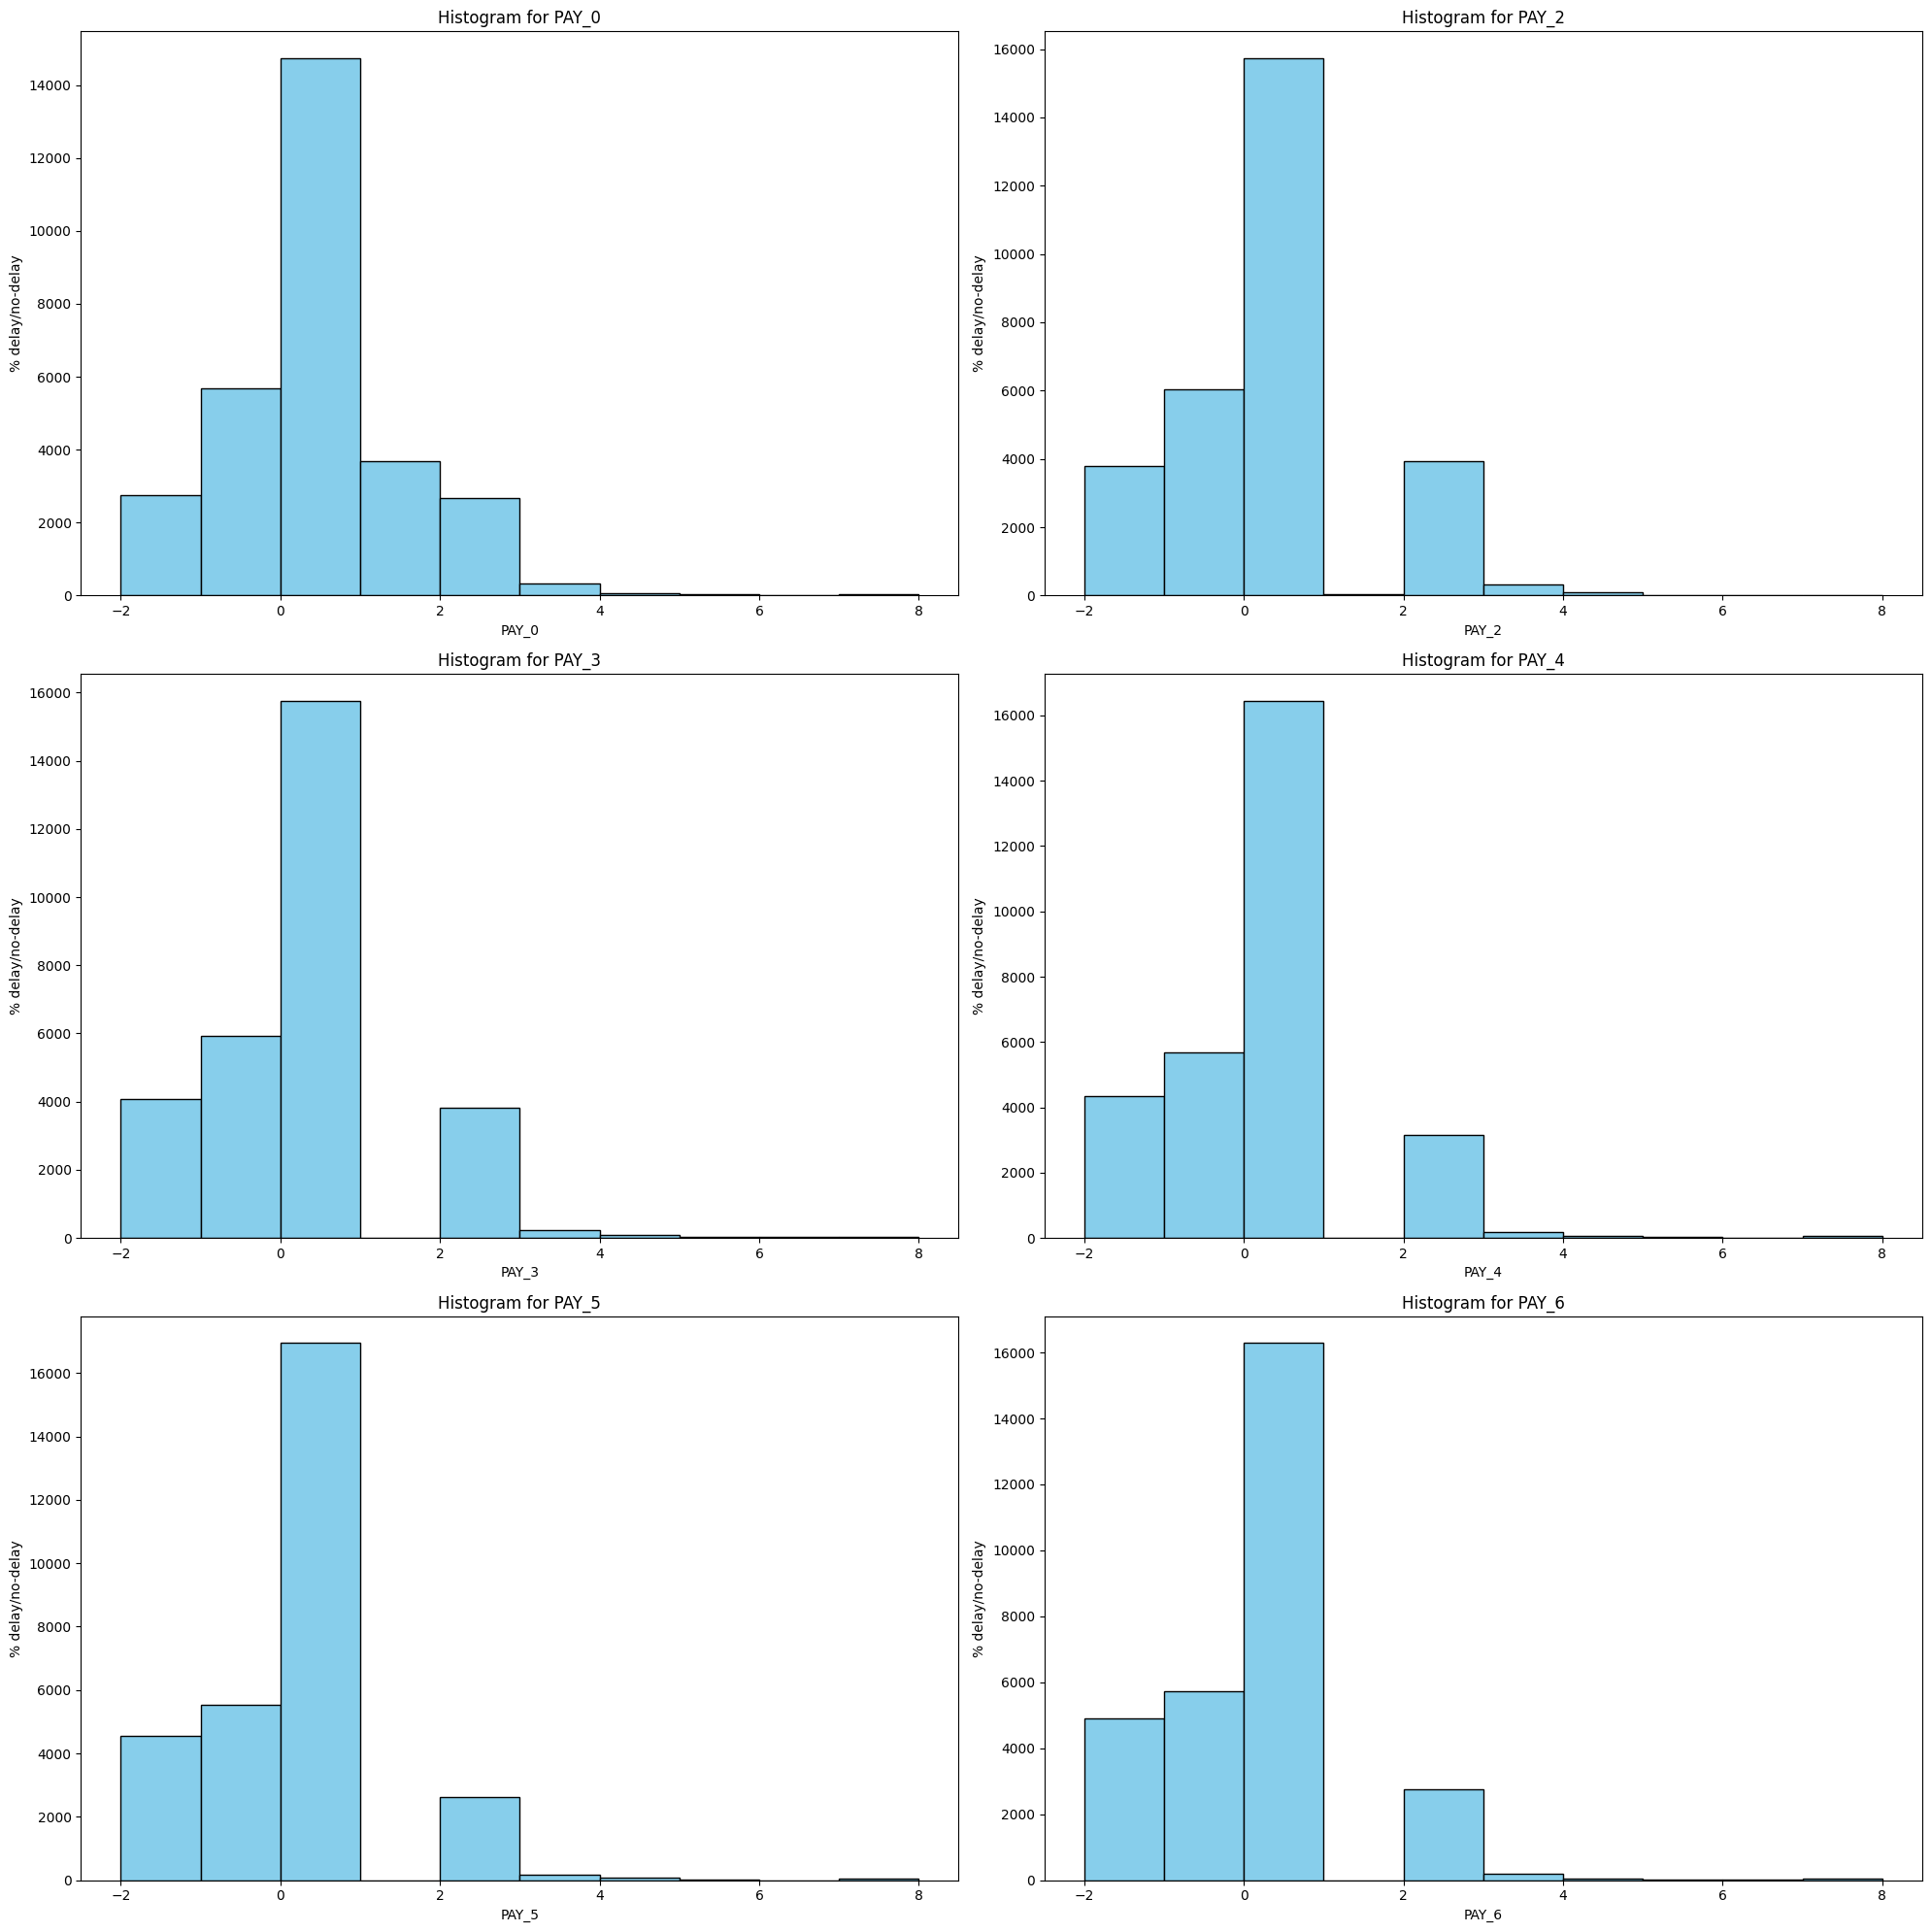

In [ ]:

viz_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 20), squeeze=False)

for idx, column in enumerate(viz_columns):
    ax = axes[idx // 2, idx % 2]
    ax.hist(df[column], color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram for {column}')  # Set a title for each subplot

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()


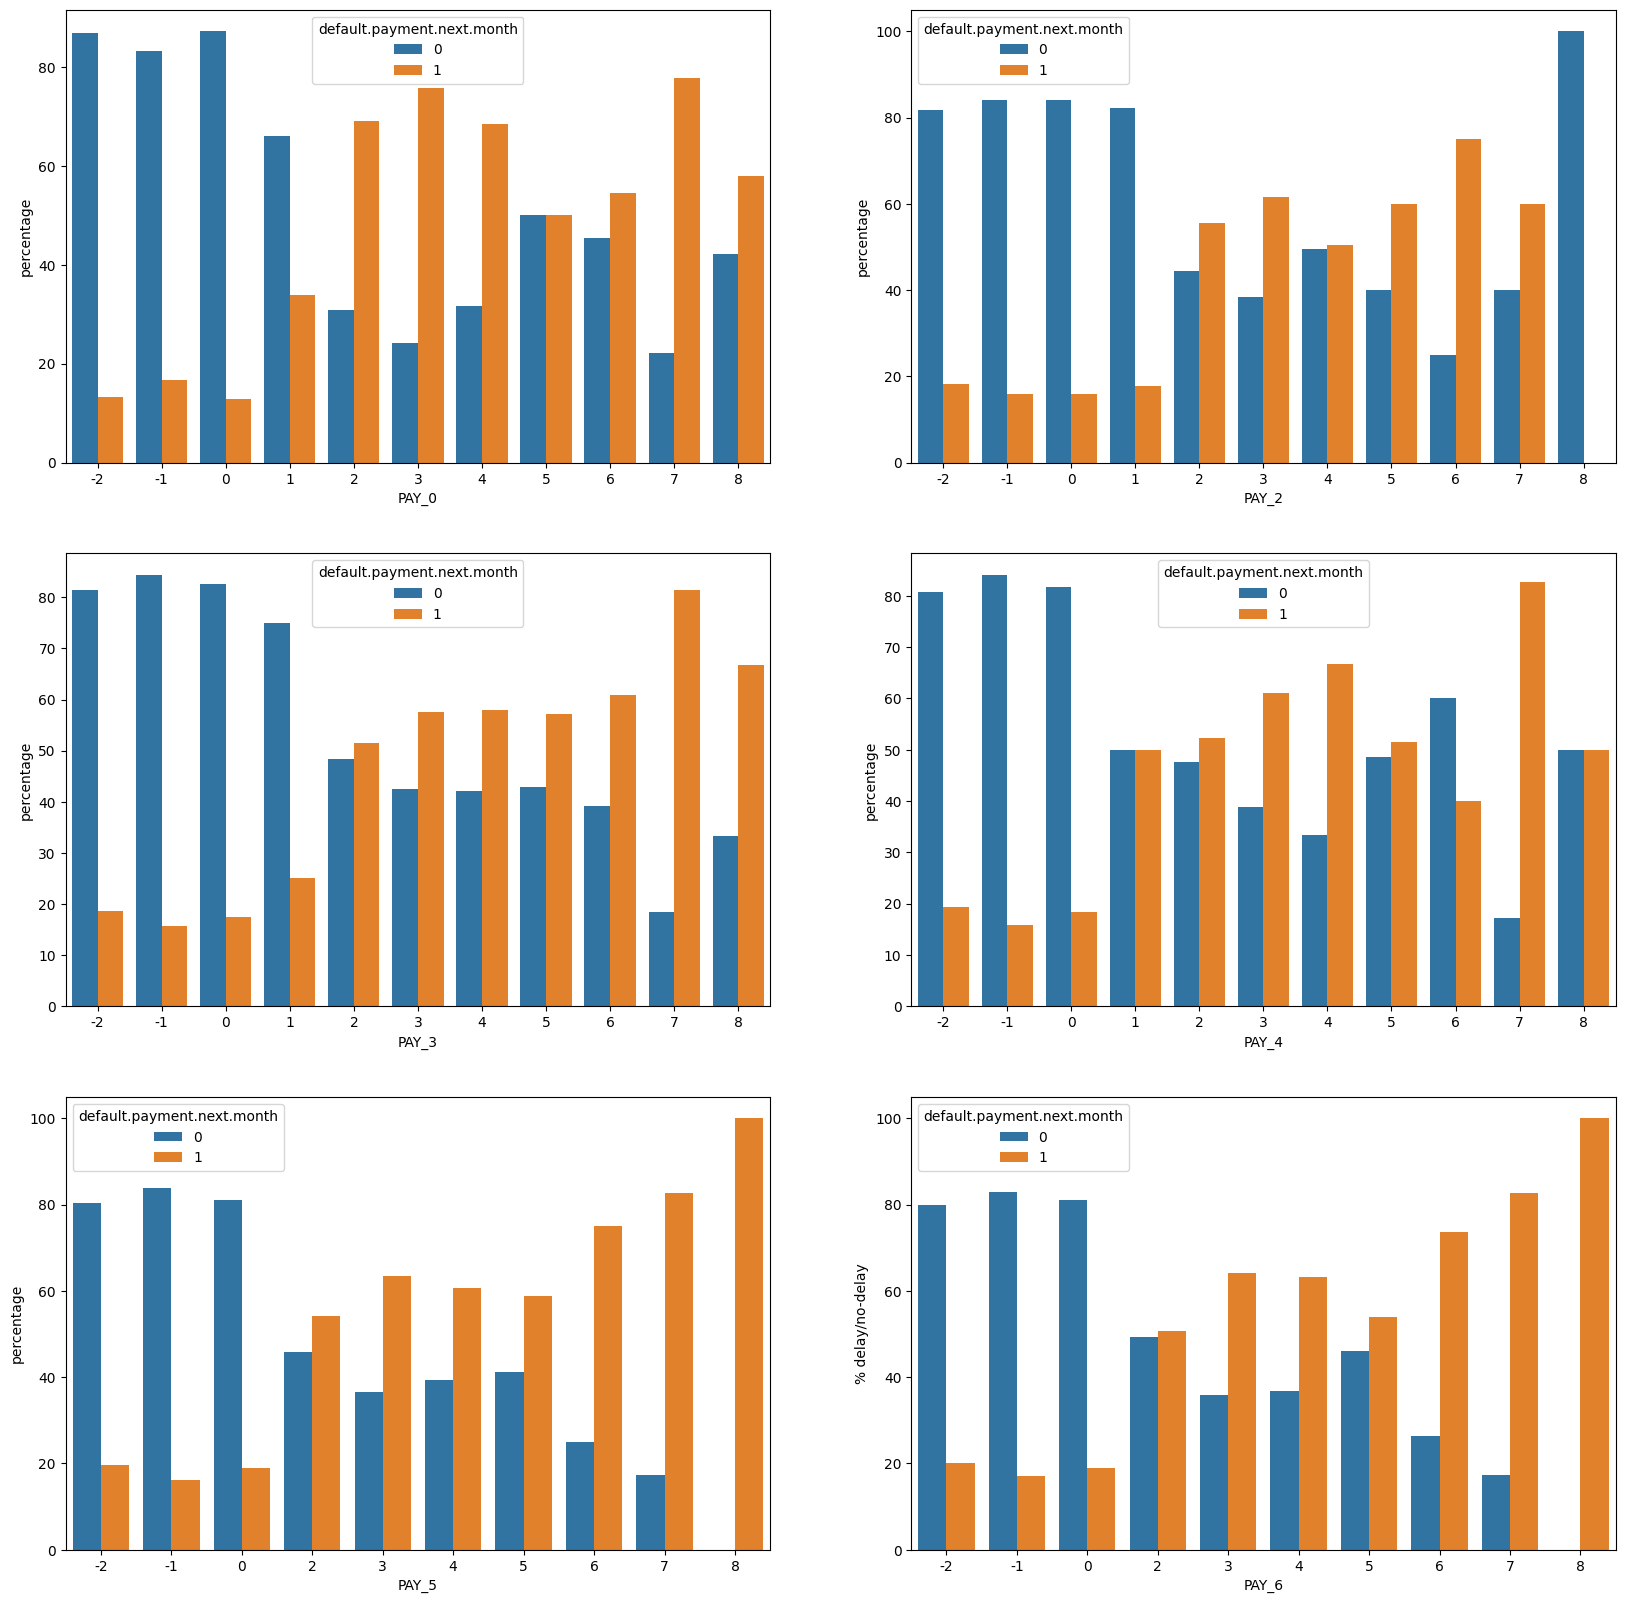

In [ ]:
viz_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)
# fig.autofmt_xdate(rotation=90)

for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]
    temp = df.groupby(column)['default.payment.next.month'].value_counts(normalize=True).rename('percentage').\
    mul(100).reset_index().sort_values(column)
    sns.barplot(x=column, y="percentage", hue="default.payment.next.month", data=temp, ax=ax)
    plt.ylabel('% delay/no-delay')


plt.show()

- From the last chart, we can observe that people who are late to pay are most likely to not pay next month (0) ans vice versa (1).




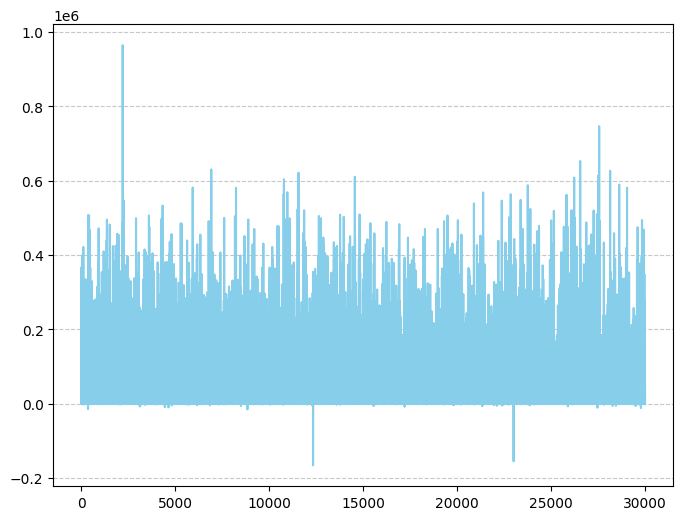

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(df.BILL_AMT1,  color='skyblue')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

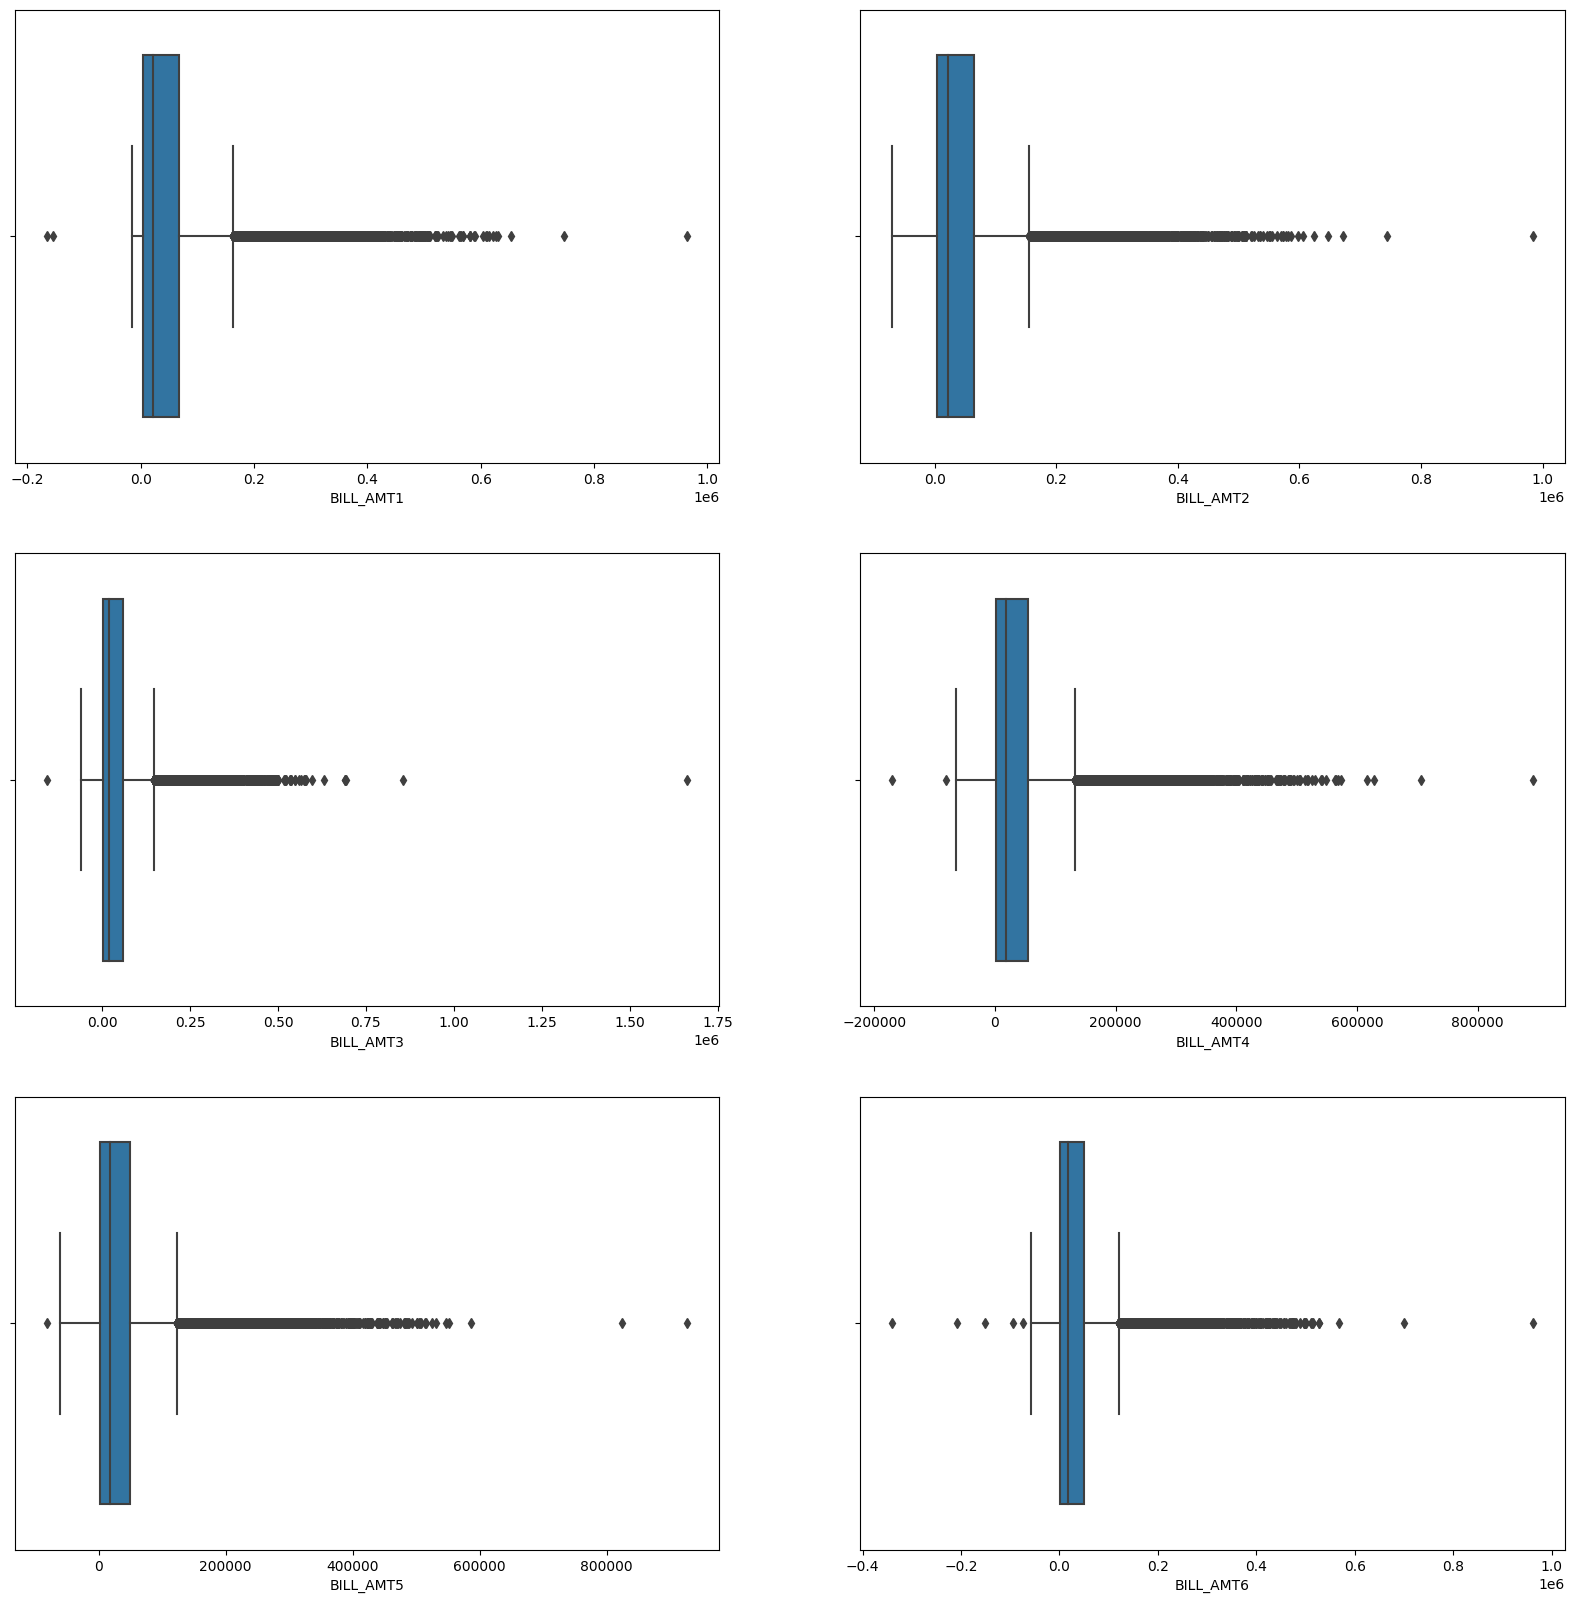

<Figure size 300x600 with 0 Axes>

<Figure size 300x600 with 0 Axes>

<Figure size 300x600 with 0 Axes>

<Figure size 300x600 with 0 Axes>

<Figure size 300x600 with 0 Axes>

<Figure size 300x600 with 0 Axes>

In [ ]:
viz_columns = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)
# fig.autofmt_xdate(rotation=90)

for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]
    plt.figure(figsize=(3, 6))
    sns.boxplot(data=df, x=df[column], ax=ax)
plt.show()

In [ ]:
df[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe().T

,count,mean,std,min,25%,50%,75%,max
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0
BILL_AMT2,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0
BILL_AMT3,30000.0,47013.154800,69349.387427,-157264.0,2666.25,20088.5,60164.75,1664089.0
BILL_AMT4,30000.0,43262.948967,64332.856134,-170000.0,2326.75,19052.0,54506.00,891586.0
BILL_AMT5,30000.0,40311.400967,60797.155770,-81334.0,1763.00,18104.5,50190.50,927171.0
BILL_AMT6,30000.0,38871.760400,59554.107537,-339603.0,1256.00,17071.0,49198.25,961664.0


##REVISE THIS PART

In [ ]:
df2 = pd.DataFrame()
df2['DUE_1']=df['BILL_AMT1']-df['PAY_AMT1']
df2['DUE_2']=df['BILL_AMT2']-df['PAY_AMT2']
df2['DUE_3']=df['BILL_AMT3']-df['PAY_AMT3']
df2['DUE_4']=df['BILL_AMT4']-df['PAY_AMT4']
df2['DUE_5']=df['BILL_AMT5']-df['PAY_AMT5']
df2['DUE_6']=df['BILL_AMT6']-df['PAY_AMT6']
df2.head()

,DUE_1,DUE_2,DUE_3,DUE_4,DUE_5,DUE_6
0,3913.0,2413.0,689.0,0.0,0.0,0.0
1,2682.0,725.0,1682.0,2272.0,3455.0,1261.0
2,27721.0,12527.0,12559.0,13331.0,13948.0,10549.0
3,44990.0,46214.0,48091.0,27214.0,27890.0,28547.0
4,6617.0,-31011.0,25835.0,11940.0,18457.0,18452.0


<ipython-input-248-9762ee8d9017>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['DUE_1'])


<Axes: xlabel='DUE_1', ylabel='Density'>

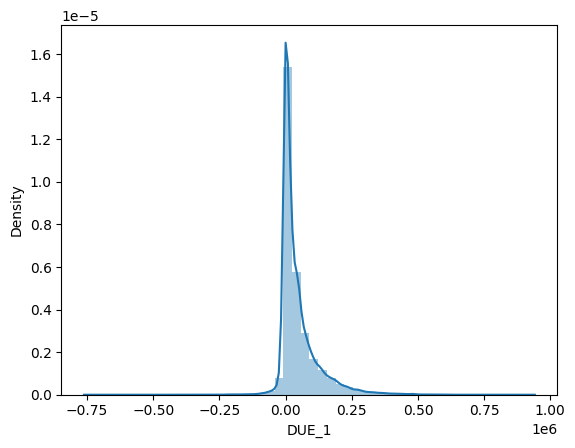

In [ ]:
sns.distplot(df2['DUE_1'])

<ipython-input-249-e59204ba8d3d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[column],ax=ax)
<ipython-input-249-e59204ba8d3d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[column],ax=ax)
<ipython-input-249-e59204ba8d3d>:8: UserWarning: 

`distplot` is a deprecated function and wil

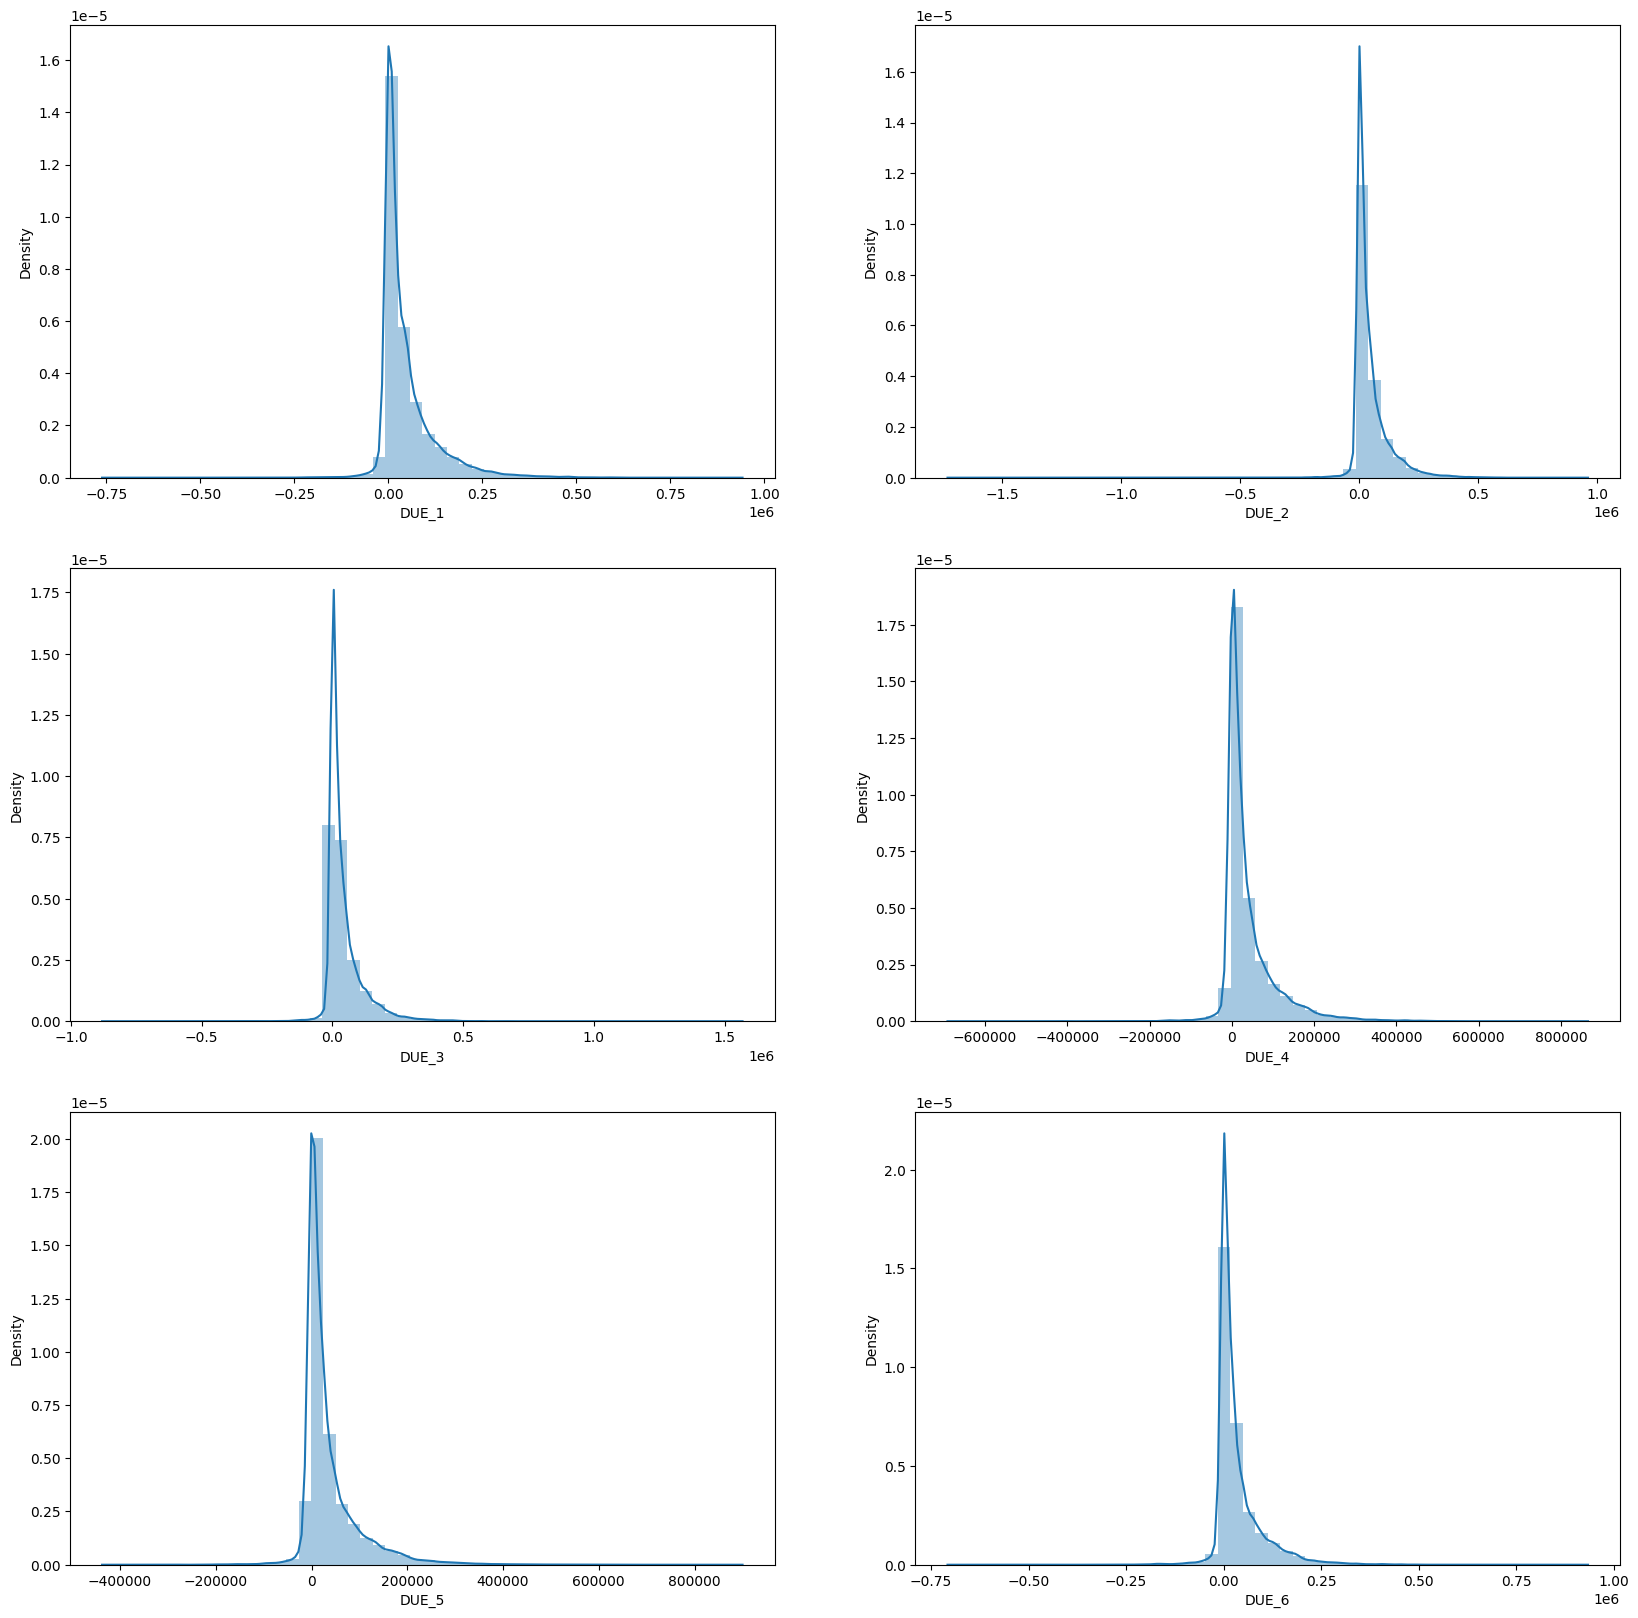

<Figure size 300x600 with 0 Axes>

<Figure size 300x600 with 0 Axes>

<Figure size 300x600 with 0 Axes>

<Figure size 300x600 with 0 Axes>

<Figure size 300x600 with 0 Axes>

<Figure size 300x600 with 0 Axes>

In [ ]:
viz_columns = ['DUE_1', 'DUE_2', 'DUE_3', 'DUE_4', 'DUE_5', 'DUE_6']
fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)
# fig.autofmt_xdate(rotation=90)

for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]
    plt.figure(figsize=(3, 6))
    sns.distplot(df2[column],ax=ax)
plt.show()

- CAN I SAY THAT I CAN USE DUE_1 TO PREDICT IF THE CLIENT PAY OR NOT

In [ ]:
filtered_df = df[df['BILL_AMT1'] < 0]
filtered_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
26,27,60000.0,1,1,2,27,1,-2,-1,-1,...,-57.0,127.0,-189.0,0.0,1000.0,0.0,500.0,0.0,1000.0,1
68,69,130000.0,2,3,2,29,1,-2,-2,-1,...,10311.0,10161.0,7319.0,0.0,0.0,20161.0,0.0,7319.0,13899.0,0
92,93,100000.0,2,1,2,27,-2,-2,-2,-2,...,0.0,0.0,0.0,7555.0,0.0,0.0,0.0,0.0,0.0,0
101,102,380000.0,2,1,2,30,-2,-2,-1,0,...,32891.0,33564.0,34056.0,223.0,33178.0,1171.0,1197.0,1250.0,5000.0,0
109,110,360000.0,1,2,1,35,1,-2,-2,-2,...,-103.0,-103.0,-103.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29845,29846,10000.0,1,2,1,37,1,-2,-1,3,...,5007.0,4779.0,7680.0,0.0,5500.0,0.0,0.0,3000.0,2000.0,1
29851,29852,270000.0,1,2,2,36,1,-1,-1,-2,...,-54.0,19315.0,8388.0,3342.0,0.0,0.0,19369.0,996.0,3.0,0
29922,29923,150000.0,1,2,1,35,1,-2,-2,-2,...,-18.0,-18.0,-18.0,0.0,0.0,0.0,0.0,0.0,0.0,0
29962,29963,50000.0,1,2,2,30,1,-1,2,-1,...,7300.0,0.0,0.0,528.0,0.0,7300.0,0.0,0.0,0.0,0


In [ ]:
filtered_df = df[df['BILL_AMT2'] < 0]
filtered_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
26,27,60000.0,1,1,2,27,1,-2,-1,-1,...,-57.0,127.0,-189.0,0.0,1000.0,0.0,500.0,0.0,1000.0,1
35,36,160000.0,1,1,2,30,-1,-1,-2,-2,...,-923.0,-1488.0,-1884.0,131.0,396.0,396.0,565.0,792.0,0.0,0
68,69,130000.0,2,3,2,29,1,-2,-2,-1,...,10311.0,10161.0,7319.0,0.0,0.0,20161.0,0.0,7319.0,13899.0,0
101,102,380000.0,2,1,2,30,-2,-2,-1,0,...,32891.0,33564.0,34056.0,223.0,33178.0,1171.0,1197.0,1250.0,5000.0,0
109,110,360000.0,1,2,1,35,1,-2,-2,-2,...,-103.0,-103.0,-103.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29779,29780,50000.0,1,2,1,32,1,-2,-1,-1,...,2850.0,6340.0,3110.0,10000.0,10000.0,7867.0,6340.0,3000.0,2218.0,0
29780,29781,100000.0,1,2,2,29,0,0,-1,-1,...,1044.0,-217.0,522.0,0.0,4000.0,1044.0,0.0,2000.0,2000.0,0
29845,29846,10000.0,1,2,1,37,1,-2,-1,3,...,5007.0,4779.0,7680.0,0.0,5500.0,0.0,0.0,3000.0,2000.0,1
29910,29911,310000.0,1,2,2,30,-2,-2,-2,-2,...,0.0,0.0,291.0,0.0,1003.0,0.0,0.0,291.0,173.0,0


In [ ]:
filtered_df = df[df['BILL_AMT3'] < 0]
filtered_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
35,36,160000.0,1,1,2,30,-1,-1,-2,-2,...,-923.0,-1488.0,-1884.0,131.0,396.0,396.0,565.0,792.0,0.0,0
68,69,130000.0,2,3,2,29,1,-2,-2,-1,...,10311.0,10161.0,7319.0,0.0,0.0,20161.0,0.0,7319.0,13899.0,0
72,73,200000.0,2,2,1,32,-1,-1,-1,-1,...,5247.0,3848.0,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0
109,110,360000.0,1,2,1,35,1,-2,-2,-2,...,-103.0,-103.0,-103.0,0.0,0.0,0.0,0.0,0.0,0.0,0
173,174,50000.0,2,1,2,24,1,-2,-2,-2,...,-2898.0,-3272.0,-3272.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29749,29750,180000.0,1,2,2,34,-2,-2,-2,-2,...,850.0,0.0,0.0,0.0,0.0,866.0,0.0,0.0,0.0,0
29851,29852,270000.0,1,2,2,36,1,-1,-1,-2,...,-54.0,19315.0,8388.0,3342.0,0.0,0.0,19369.0,996.0,3.0,0
29888,29889,180000.0,1,3,1,40,0,0,0,-1,...,111077.0,112738.0,115746.0,4400.0,0.0,112736.0,5000.0,5300.0,5000.0,0
29922,29923,150000.0,1,2,1,35,1,-2,-2,-2,...,-18.0,-18.0,-18.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
filtered_df = df[df['BILL_AMT4'] < 0]
filtered_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
26,27,60000.0,1,1,2,27,1,-2,-1,-1,...,-57.0,127.0,-189.0,0.0,1000.0,0.0,500.0,0.0,1000.0,1
35,36,160000.0,1,1,2,30,-1,-1,-2,-2,...,-923.0,-1488.0,-1884.0,131.0,396.0,396.0,565.0,792.0,0.0,0
109,110,360000.0,1,2,1,35,1,-2,-2,-2,...,-103.0,-103.0,-103.0,0.0,0.0,0.0,0.0,0.0,0.0,0
130,131,30000.0,2,1,2,23,1,-2,-2,-2,...,-27.0,13744.0,5906.0,5645.0,3508.0,27.0,13771.0,5911.0,3024.0,0
173,174,50000.0,2,1,2,24,1,-2,-2,-2,...,-2898.0,-3272.0,-3272.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29636,29637,160000.0,1,1,2,35,-1,2,2,-2,...,-630.0,-956.0,476.0,0.0,0.0,0.0,0.0,1908.0,326.0,0
29677,29678,20000.0,1,2,2,34,0,0,-2,-2,...,-1.0,309.0,9525.0,0.0,0.0,0.0,310.0,9500.0,800.0,0
29698,29699,310000.0,1,1,1,47,-2,-2,-2,-2,...,-74.0,2226.0,-484.0,0.0,0.0,2400.0,2300.0,0.0,0.0,0
29851,29852,270000.0,1,2,2,36,1,-1,-1,-2,...,-54.0,19315.0,8388.0,3342.0,0.0,0.0,19369.0,996.0,3.0,0


In [ ]:
filtered_df = df[df['BILL_AMT5'] < 0]
filtered_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
35,36,160000.0,1,1,2,30,-1,-1,-2,-2,...,-923.0,-1488.0,-1884.0,131.0,396.0,396.0,565.0,792.0,0.0,0
37,38,60000.0,2,2,2,22,0,0,0,0,...,6026.0,-28335.0,18660.0,1500.0,1518.0,2043.0,0.0,47671.0,617.0,0
56,57,180000.0,2,3,1,34,0,0,0,-1,...,7142.0,-679.0,8321.0,8500.0,1500.0,7500.0,679.0,9000.0,2000.0,0
109,110,360000.0,1,2,1,35,1,-2,-2,-2,...,-103.0,-103.0,-103.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29732,29733,10000.0,1,2,1,45,1,2,2,2,...,6267.0,-610.0,-220.0,0.0,4312.0,0.0,0.0,780.0,1150.0,0
29780,29781,100000.0,1,2,2,29,0,0,-1,-1,...,1044.0,-217.0,522.0,0.0,4000.0,1044.0,0.0,2000.0,2000.0,0
29782,29783,300000.0,1,3,1,32,-1,-1,-1,0,...,3242.0,-80.0,720.0,2635.0,1461.0,2000.0,0.0,800.0,15.0,0
29862,29863,50000.0,1,2,1,38,0,0,0,0,...,4768.0,-52.0,-52.0,1200.0,1200.0,1020.0,0.0,0.0,7000.0,1


In [ ]:
filtered_df = df[df['BILL_AMT6'] < 0]
filtered_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
26,27,60000.0,1,1,2,27,1,-2,-1,-1,...,-57.0,127.0,-189.0,0.0,1000.0,0.0,500.0,0.0,1000.0,1
35,36,160000.0,1,1,2,30,-1,-1,-2,-2,...,-923.0,-1488.0,-1884.0,131.0,396.0,396.0,565.0,792.0,0.0,0
109,110,360000.0,1,2,1,35,1,-2,-2,-2,...,-103.0,-103.0,-103.0,0.0,0.0,0.0,0.0,0.0,0.0,0
134,135,30000.0,2,2,2,22,0,0,0,0,...,25350.0,17603.0,-780.0,2000.0,1400.0,0.0,500.0,0.0,1560.0,0
167,168,100000.0,1,2,1,27,-1,2,2,0,...,29336.0,22979.0,-246.0,3166.0,0.0,1330.0,1398.0,12.0,50000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29862,29863,50000.0,1,2,1,38,0,0,0,0,...,4768.0,-52.0,-52.0,1200.0,1200.0,1020.0,0.0,0.0,7000.0,1
29921,29922,410000.0,1,1,2,34,0,0,0,-1,...,1467.0,1421.0,-15.0,17259.0,18600.0,1474.0,1428.0,0.0,0.0,1
29922,29923,150000.0,1,2,1,35,1,-2,-2,-2,...,-18.0,-18.0,-18.0,0.0,0.0,0.0,0.0,0.0,0.0,0
29931,29932,60000.0,1,2,3,41,0,0,0,0,...,26940.0,9971.0,-11798.0,2200.0,2000.0,1200.0,0.0,0.0,28000.0,0


#Data Cleaning

**QUESTIONS**
1. is there pay_amt and bill with negative and does it make sense?
2. should I use DUE directly and take the absolute instead of using pay and bill
3. for data cleaning -2 should change to 0
4. pay_0 should change to pay_1
5. try random_froest model
6. should I drop anything till now?

In [ ]:
df = df.rename(columns={'PAY_0': 'PAY_1'})
df = df.rename(columns={'default.payment.next.month':'default_payment'})

In [ ]:
df['EDUCATION'] = df['EDUCATION'].replace([5, 6], 0)

#Data Preprocessing

In [ ]:
X = df.drop(['ID','default_payment'],axis='columns')
y = df['default_payment']

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

#Model Selection

##Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_validation_pred = model.predict(X_validation)
accuracy_validation = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {accuracy_validation * 100:.2f}%")

# Make predictions on the test data
y_test_pred = model.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")
# Calculate precision
precision = precision_score(y_test, y_test_pred)

# Calculate recall
recall = recall_score(y_test, y_test_pred)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
f1score = f1_score(y_test, y_test_pred)

print(f"F1-Score: {f1score:.2f}")

Validation Accuracy: 77.94%
Test Accuracy: 78.83%
Precision: 0.00
Recall: 0.00
F1-Score: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


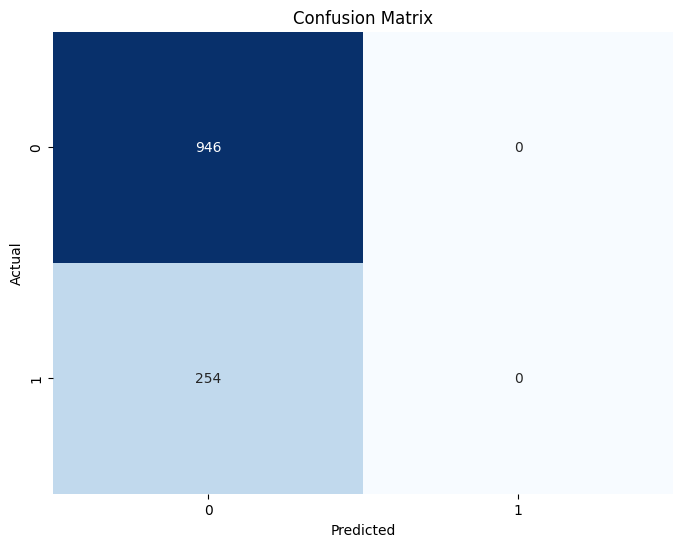

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##SVM

Validation Accuracy: 77.83%
Test Accuracy: 79.00%
Precision: 0.67
Recall: 0.02
F1-Score: 0.03


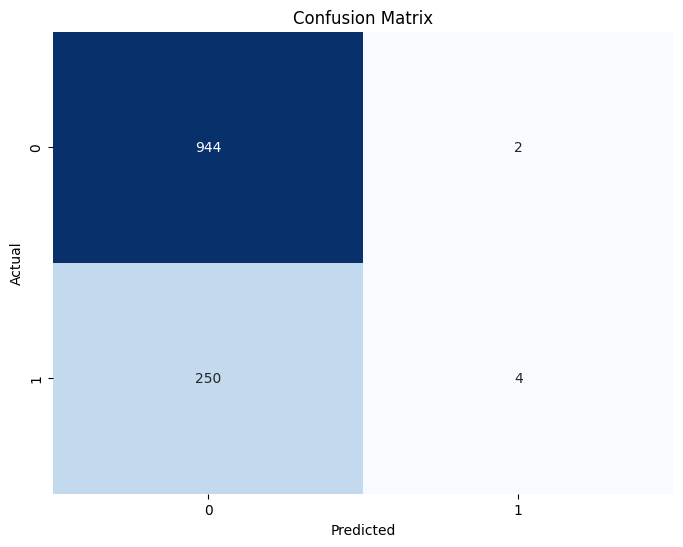

In [ ]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
y_validation_pred = svm.predict(X_validation)
accuracy_validation = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {accuracy_validation * 100:.2f}%")

# Make predictions on the test data
y_test_pred = svm.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")
# Calculate precision
precision = precision_score(y_test, y_test_pred)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_test_pred)
print(f"Recall: {recall:.2f}")

# Calculate f1_score

f1score = f1_score(y_test, y_test_pred)
print(f"F1-Score: {f1score:.2f}")

#Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

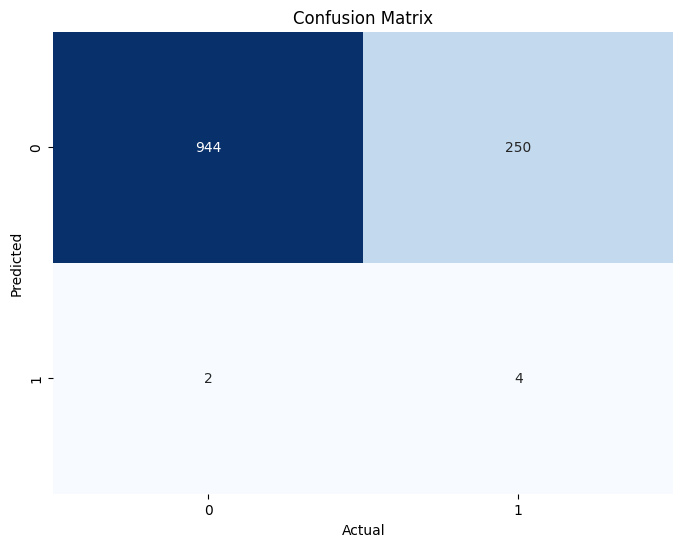

In [ ]:
conf_matrix = confusion_matrix(y_test, y_test_pred).T

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##Random Forest

Validation Accuracy: 81.42%
Test Accuracy: 82.75%
Precision: 0.66
Recall: 0.37
F1-Score: 0.48


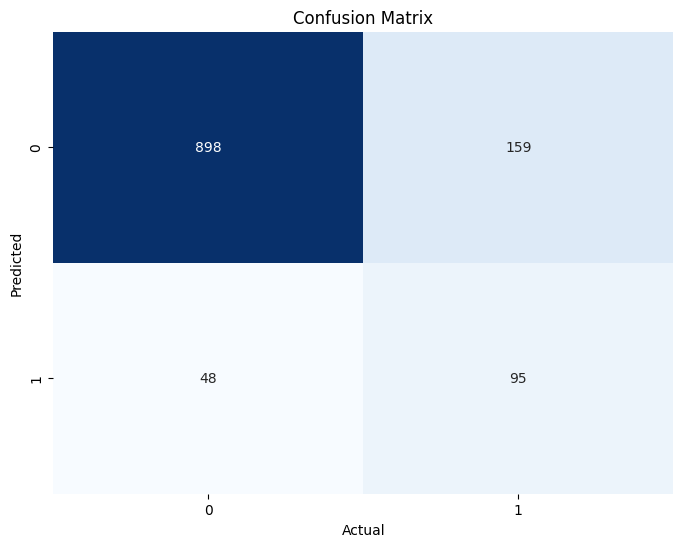

In [ ]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
y_validation_pred = rf.predict(X_validation)
accuracy_validation = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {accuracy_validation * 100:.2f}%")

# Make predictions on the test data
y_test_pred = rf.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")
# Calculate precision
precision = precision_score(y_test, y_test_pred)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_test_pred)
print(f"Recall: {recall:.2f}")

# Calculate f1_score

f1score = f1_score(y_test, y_test_pred)
print(f"F1-Score: {f1score:.2f}")

#Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred).T

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##Decision Tree

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_validation_pred = clf.predict(X_validation)
accuracy_validation = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {accuracy_validation * 100:.2f}%")

# Make predictions on the test data
y_test_pred = clf.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")
# Calculate precision
precision = precision_score(y_test, y_test_pred)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_test_pred)
print(f"Recall: {recall:.2f}")

# Calculate f1_score

f1score = f1_score(y_test, y_test_pred)
print(f"F1-Score: {f1score:.2f}")

#Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred).T

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
param_grid = {
    'n_estimators': [38,100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2,0.3],
    'max_depth': [3, 4, 5, 8],
    'min_child_weight': [1, 2, 3, 4],
}

# Create an instance of the XGBoost classifier
xgb = XGBClassifier()

# Create a GridSearchCV object with the classifier and hyperparameters
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy Score: ", grid_search.best_score_)

KeyboardInterrupt: ignored

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
param_grid = {
    'n_estimators': [38,100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2,0.3],
    'max_depth': [3, 4, 5, 8],
    'min_child_weight': [1, 2, 3, 4],
}

# Create an instance of the XGBoost classifier
xgb = XGBClassifier()

# Create a GridSearchCV object with the classifier and hyperparameters
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='f1', cv=5)

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy Score: ", grid_search.best_score_)

Validation Accuracy: 81.92%
Test Accuracy: 83.17%
Precision: 0.68
Recall: 0.39
F1-Score: 0.49


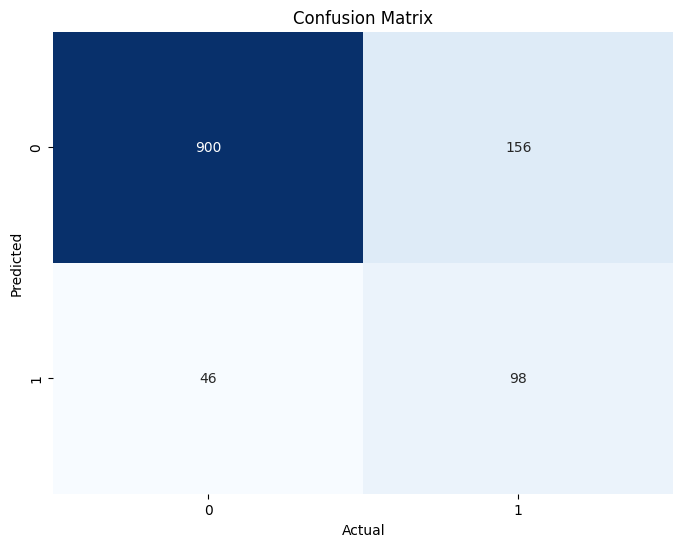

In [ ]:
import xgboost as xgb
xgb = xgb.XGBClassifier(n_estimators = 38,eta = 0.3)
xgb.fit(X_train, y_train)
y_validation_pred = xgb.predict(X_validation)
accuracy_validation = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {accuracy_validation * 100:.2f}%")

# Make predictions on the test data
y_test_pred = xgb.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")
# Calculate precision
precision = precision_score(y_test, y_test_pred)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_test_pred)
print(f"Recall: {recall:.2f}")

# Calculate f1_score

f1score = f1_score(y_test, y_test_pred)
print(f"F1-Score: {f1score:.2f}")

#Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred).T

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Drop 12 columns of BILL_AMT and  PAY_AMT and Replace them with their difference

In [ ]:
df2

,DUE_1,DUE_2,DUE_3,DUE_4,DUE_5,DUE_6
0,3913.0,2413.0,689.0,0.0,0.0,0.0
1,2682.0,725.0,1682.0,2272.0,3455.0,1261.0
2,27721.0,12527.0,12559.0,13331.0,13948.0,10549.0
3,44990.0,46214.0,48091.0,27214.0,27890.0,28547.0
4,6617.0,-31011.0,25835.0,11940.0,18457.0,18452.0
...,...,...,...,...,...,...
29995,180448.0,172815.0,203362.0,84957.0,26237.0,14980.0
29996,-154.0,-1698.0,-5496.0,8850.0,5190.0,0.0
29997,3565.0,3356.0,-19242.0,16678.0,18582.0,16257.0
29998,-87545.0,74970.0,75126.0,50848.0,-41109.0,47140.0


In [ ]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


##Data Preprocessing

In [ ]:
df3 = pd.concat([df, df2], axis=1)
df3.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment,DUE_1,DUE_2,DUE_3,DUE_4,DUE_5,DUE_6
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,1,3913.0,2413.0,689.0,0.0,0.0,0.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,1000.0,0.0,2000.0,1,2682.0,725.0,1682.0,2272.0,3455.0,1261.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,1000.0,1000.0,5000.0,0,27721.0,12527.0,12559.0,13331.0,13948.0,10549.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,1100.0,1069.0,1000.0,0,44990.0,46214.0,48091.0,27214.0,27890.0,28547.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,9000.0,689.0,679.0,0,6617.0,-31011.0,25835.0,11940.0,18457.0,18452.0


In [ ]:
X = df3.drop(['ID','AGE','default_payment','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'],axis='columns')
y = df['default_payment']

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

##Model Selection

###Logistic Regression

In [ ]:
log2 = LogisticRegression()
log2.fit(X_train, y_train)
y_validation_pred = log2.predict(X_validation)
accuracy_validation = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {accuracy_validation * 100:.2f}%")

# Make predictions on the test data
y_test_pred = log2.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")
# Calculate precision
precision = precision_score(y_test, y_test_pred)

# Calculate recall
recall = recall_score(y_test, y_test_pred)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
f1score = f1_score(y_test, y_test_pred)

print(f"F1-Score: {f1score:.2f}")

Validation Accuracy: 77.94%
Test Accuracy: 78.83%
Precision: 0.00
Recall: 0.00
F1-Score: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


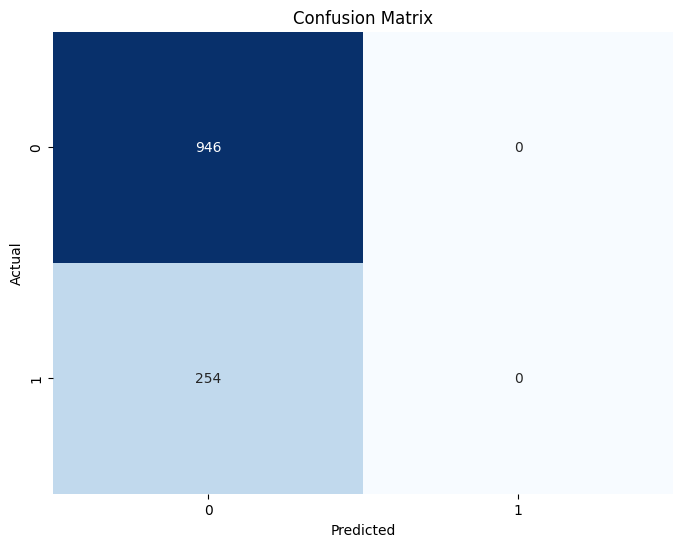

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###SVM

Validation Accuracy: 77.83%
Test Accuracy: 79.08%
Precision: 0.71
Recall: 0.02
F1-Score: 0.04


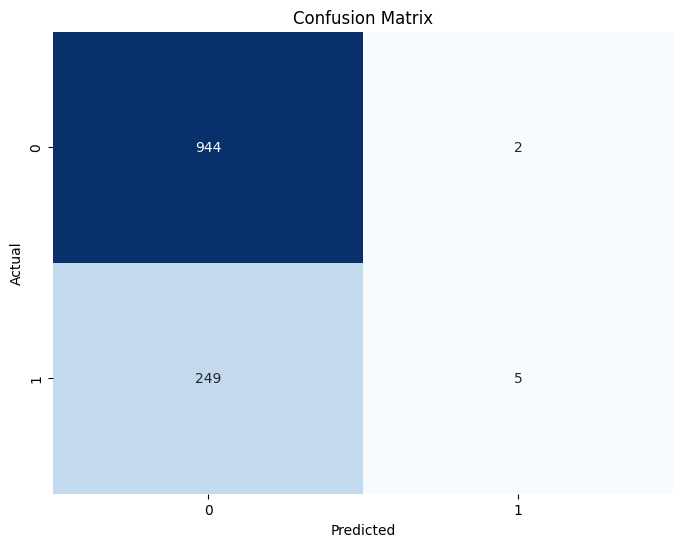

In [ ]:
svm2 = SVC(gamma='auto')
svm2.fit(X_train, y_train)
y_validation_pred = svm2.predict(X_validation)
accuracy_validation = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {accuracy_validation * 100:.2f}%")

# Make predictions on the test data
y_test_pred = svm2.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")
# Calculate precision
precision = precision_score(y_test, y_test_pred)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_test_pred)
print(f"Recall: {recall:.2f}")

# Calculate f1_score

f1score = f1_score(y_test, y_test_pred)
print(f"F1-Score: {f1score:.2f}")

#Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

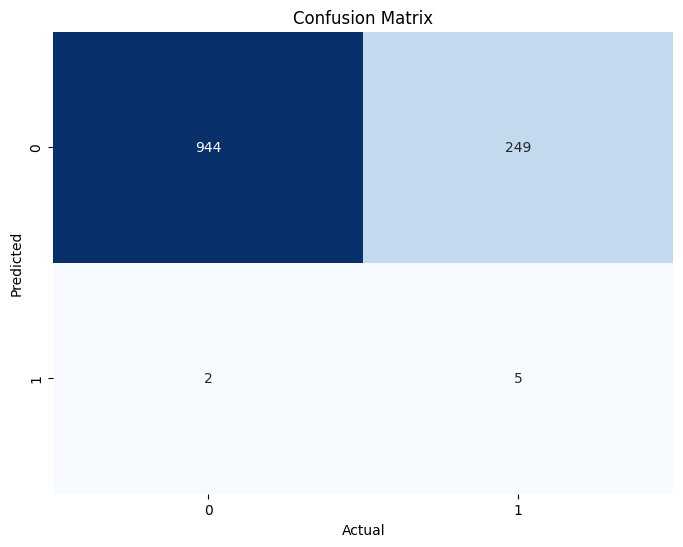

In [ ]:
conf_matrix = confusion_matrix(y_test, y_test_pred).T

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()




###Random Forest

Validation Accuracy: 80.92%
Test Accuracy: 81.83%
Precision: 0.62
Recall: 0.37
F1-Score: 0.47


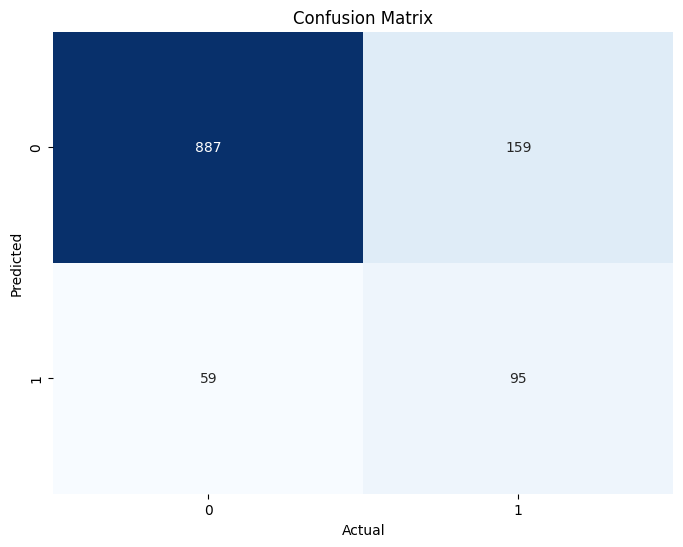

In [ ]:
rf2 = RandomForestClassifier(n_estimators=40)
rf2.fit(X_train, y_train)
y_validation_pred = rf2.predict(X_validation)
accuracy_validation = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {accuracy_validation * 100:.2f}%")

# Make predictions on the test data
y_test_pred = rf2.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")
# Calculate precision
precision = precision_score(y_test, y_test_pred)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_test_pred)
print(f"Recall: {recall:.2f}")

# Calculate f1_score

f1score = f1_score(y_test, y_test_pred)
print(f"F1-Score: {f1score:.2f}")

#Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred).T

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###Decision Tree

Validation Accuracy: 72.75%
Test Accuracy: 72.50%
Precision: 0.37
Recall: 0.43
F1-Score: 0.40


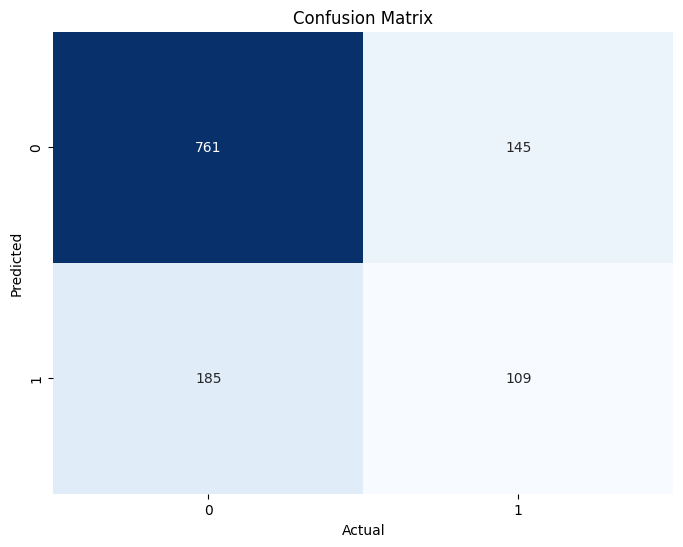

In [ ]:
clf2 = DecisionTreeClassifier(random_state=42)
clf2.fit(X_train, y_train)
y_validation_pred = clf2.predict(X_validation)
accuracy_validation = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {accuracy_validation * 100:.2f}%")

# Make predictions on the test data
y_test_pred = clf2.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")
# Calculate precision
precision = precision_score(y_test, y_test_pred)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_test_pred)
print(f"Recall: {recall:.2f}")

# Calculate f1_score

f1score = f1_score(y_test, y_test_pred)
print(f"F1-Score: {f1score:.2f}")

#Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred).T

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###XGBoost

Validation Accuracy: 81.73%
Test Accuracy: 83.75%
Precision: 0.70
Recall: 0.41
F1-Score: 0.51


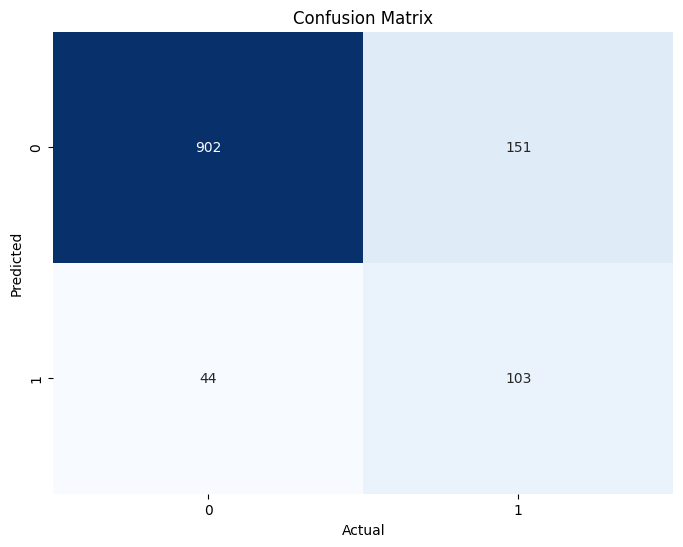

In [ ]:
import xgboost as xgb
xgb2 = xgb.XGBClassifier(n_estimators=38,gamma=4)
xgb2.fit(X_train, y_train)
y_validation_pred = xgb2.predict(X_validation)
accuracy_validation = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {accuracy_validation * 100:.2f}%")

# Make predictions on the test data
y_test_pred = xgb2.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")
# Calculate precision
precision = precision_score(y_test, y_test_pred)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_test_pred)
print(f"Recall: {recall:.2f}")

# Calculate f1_score

f1score = f1_score(y_test, y_test_pred)
print(f"F1-Score: {f1score:.2f}")

#Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred).T

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Drop negative Bill_AMT

In [ ]:
df4 = pd.DataFrame()

In [ ]:
df4 = df3[df3['BILL_AMT1'] > 0]
df4 = df3[df3['BILL_AMT2'] > 0]
df4 = df3[df3['BILL_AMT3'] > 0]
df4 = df3[df3['BILL_AMT4'] > 0]
df4 = df3[df3['BILL_AMT5'] > 0]
df4 = df3[df3['BILL_AMT6'] > 0]
df4

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment,DUE_1,DUE_2,DUE_3,DUE_4,DUE_5,DUE_6
1,2,120000.0,2,2,2,26,-1,2,0,0,...,1000.0,0.0,2000.0,1,2682.0,725.0,1682.0,2272.0,3455.0,1261.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,1000.0,1000.0,5000.0,0,27721.0,12527.0,12559.0,13331.0,13948.0,10549.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,1100.0,1069.0,1000.0,0,44990.0,46214.0,48091.0,27214.0,27890.0,28547.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,9000.0,689.0,679.0,0,6617.0,-31011.0,25835.0,11940.0,18457.0,18452.0
5,6,50000.0,1,1,2,37,0,0,0,0,...,1000.0,1000.0,800.0,0,61900.0,55254.0,56951.0,18394.0,18619.0,19224.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,29995,80000.0,1,2,2,34,2,2,2,2,...,7000.0,0.0,4000.0,1,65557.0,74208.0,79384.0,70519.0,82607.0,77158.0
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,3047.0,5000.0,1000.0,0,180448.0,172815.0,203362.0,84957.0,26237.0,14980.0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,4200.0,2000.0,3100.0,1,3565.0,3356.0,-19242.0,16678.0,18582.0,16257.0
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,1926.0,52964.0,1804.0,1,-87545.0,74970.0,75126.0,50848.0,-41109.0,47140.0


In [ ]:
df4['DUE_1'] = np.log(df4['DUE_1'])
df4['DUE_2'] = np.log(df4['DUE_2'])
df4['DUE_3'] = np.log(df4['DUE_3'])
df4['DUE_4'] = np.log(df4['DUE_4'])
df4['DUE_5'] = np.log(df4['DUE_5'])
df4['DUE_6'] = np.log(df4['DUE_6'])
df4['LIMIT_BAL']  = np.log(df4['LIMIT_BAL'])
df4['AGE'] = np.log(df4['AGE'])
df4

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-346-76ea7b6b37ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['DUE_1'] = np.log(df4['DUE_1'])
<ipython-input-346-76ea7b6b37ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment,DUE_1,DUE_2,DUE_3,DUE_4,DUE_5,DUE_6
1,2,11.695247,2,2,2,3.258097,-1,2,0,0,...,1000.0,0.0,2000.0,1,7.894318,6.586172,7.427739,7.728416,8.147578,7.139660
2,3,11.407565,2,2,2,3.526361,0,0,0,0,...,1000.0,1000.0,5000.0,0,10.229946,9.435642,9.438193,9.497847,9.543091,9.263786
3,4,10.819778,2,2,1,3.610918,0,0,0,0,...,1100.0,1069.0,1000.0,0,10.714196,10.741038,10.780850,10.211487,10.236023,10.259307
4,5,10.819778,1,2,1,4.043051,-1,0,-1,0,...,9000.0,689.0,679.0,0,8.797397,NaN,10.159485,9.387649,9.823199,9.822928
5,6,10.819778,1,1,2,3.610918,0,0,0,0,...,1000.0,1000.0,800.0,0,11.033275,10.919696,10.949947,9.819780,9.831938,9.863915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,29995,11.289782,1,2,2,3.526361,2,2,2,2,...,7000.0,0.0,4000.0,1,11.090675,11.214627,11.282052,11.163637,11.321850,11.253611
29995,29996,12.301383,1,3,1,3.663562,0,0,0,0,...,3047.0,5000.0,1000.0,0,12.103198,12.059977,12.222743,11.349901,10.174926,9.614471
29997,29998,10.308953,1,2,2,3.610918,4,3,2,-1,...,4200.0,2000.0,3100.0,1,8.178919,8.118505,NaN,9.721846,9.829949,9.696279
29998,29999,11.289782,1,3,1,3.713572,1,-1,0,0,...,1926.0,52964.0,1804.0,1,NaN,11.224843,11.226922,10.836596,NaN,10.760877


In [ ]:
df[df['BILL_AMT1'] < df['PAY_AMT1']][['PAY_1','LIMIT_BAL','BILL_AMT1','PAY_AMT1','BILL_AMT2','PAY_AMT2','BILL_AMT3','PAY_AMT3','BILL_AMT4','PAY_AMT4','BILL_AMT5','PAY_AMT5','BILL_AMT6','PAY_AMT6','default_payment']]

In [ ]:
X = df3.drop(['ID','AGE','default_payment','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'],axis='columns')
y = df['default_payment']

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

##Model Selection

###Logistic Regression

In [ ]:
log4 = LogisticRegression()
log4.fit(X_train, y_train)
y_validation_pred = log4.predict(X_validation)
accuracy_validation = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {accuracy_validation * 100:.2f}%")

# Make predictions on the test data
y_test_pred = log4.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")
# Calculate precision
precision = precision_score(y_test, y_test_pred)

# Calculate recall
recall = recall_score(y_test, y_test_pred)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
f1score = f1_score(y_test, y_test_pred)

print(f"F1-Score: {f1score:.2f}")

Validation Accuracy: 77.94%
Test Accuracy: 78.83%
Precision: 0.00
Recall: 0.00
F1-Score: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


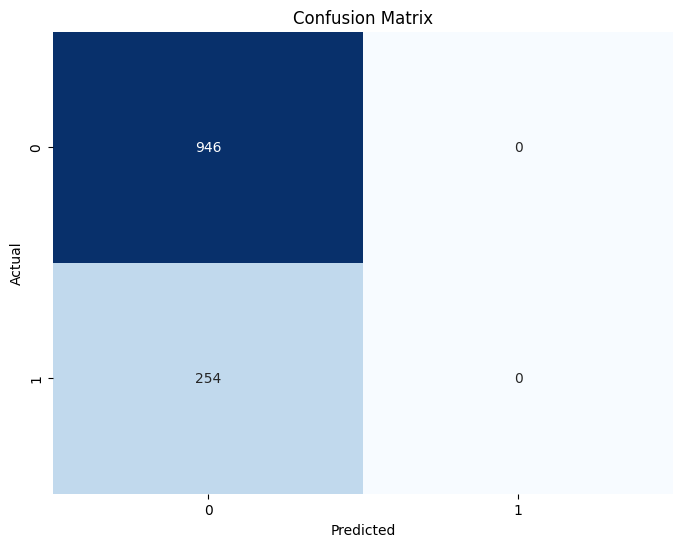

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###SVM

Validation Accuracy: 77.83%
Test Accuracy: 79.08%
Precision: 0.71
Recall: 0.02
F1-Score: 0.04


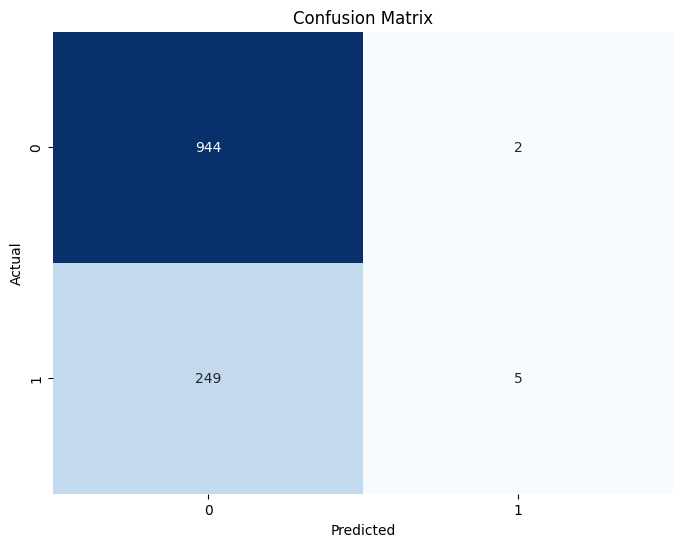

In [ ]:
svm4 = SVC(gamma='auto')
svm3.fit(X_train, y_train)
y_validation_pred = svm3.predict(X_validation)
accuracy_validation = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {accuracy_validation * 100:.2f}%")

# Make predictions on the test data
y_test_pred = svm3.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")
# Calculate precision
precision = precision_score(y_test, y_test_pred)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_test_pred)
print(f"Recall: {recall:.2f}")

# Calculate f1_score

f1score = f1_score(y_test, y_test_pred)
print(f"F1-Score: {f1score:.2f}")

#Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

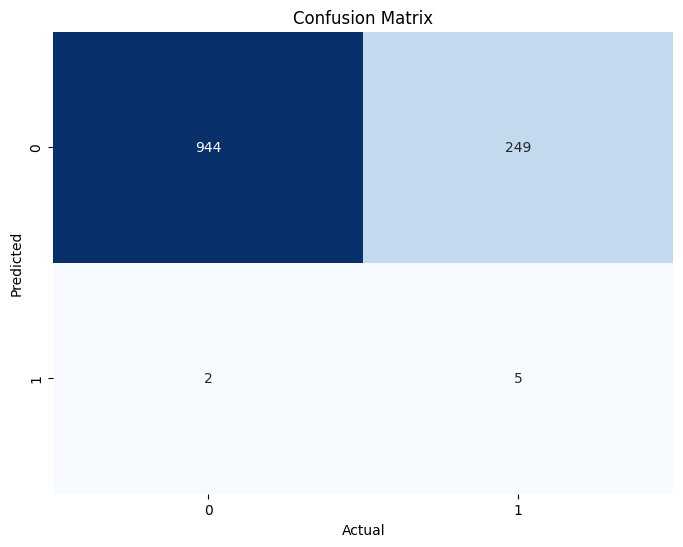

In [ ]:
conf_matrix = confusion_matrix(y_test, y_test_pred).T

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()




###Random Forest

Validation Accuracy: 80.88%
Test Accuracy: 82.17%
Precision: 0.63
Recall: 0.38
F1-Score: 0.47


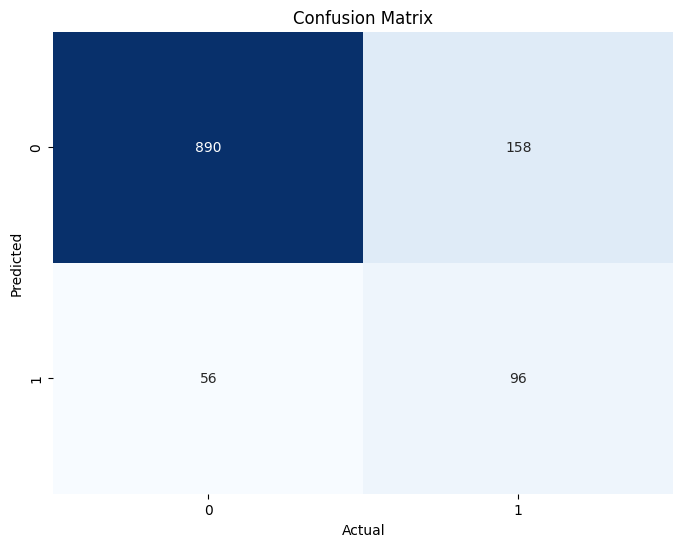

In [ ]:
rf3 = RandomForestClassifier(n_estimators=40)
rf3.fit(X_train, y_train)
y_validation_pred = rf3.predict(X_validation)
accuracy_validation = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {accuracy_validation * 100:.2f}%")

# Make predictions on the test data
y_test_pred = rf3.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")
# Calculate precision
precision = precision_score(y_test, y_test_pred)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_test_pred)
print(f"Recall: {recall:.2f}")

# Calculate f1_score

f1score = f1_score(y_test, y_test_pred)
print(f"F1-Score: {f1score:.2f}")

#Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred).T

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###Decision Tree

Validation Accuracy: 72.75%
Test Accuracy: 72.50%
Precision: 0.37
Recall: 0.43
F1-Score: 0.40


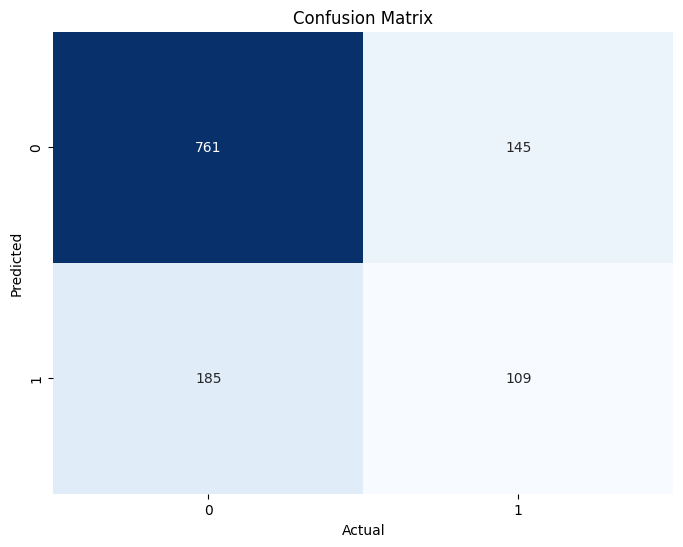

In [ ]:
clf3 = DecisionTreeClassifier(random_state=42)
clf3.fit(X_train, y_train)
y_validation_pred = clf3.predict(X_validation)
accuracy_validation = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {accuracy_validation * 100:.2f}%")

# Make predictions on the test data
y_test_pred = clf3.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")
# Calculate precision
precision = precision_score(y_test, y_test_pred)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_test_pred)
print(f"Recall: {recall:.2f}")

# Calculate f1_score

f1score = f1_score(y_test, y_test_pred)
print(f"F1-Score: {f1score:.2f}")

#Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred).T

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###XGBoost

Validation Accuracy: 81.42%
Test Accuracy: 83.58%
Precision: 0.69
Recall: 0.41
F1-Score: 0.51


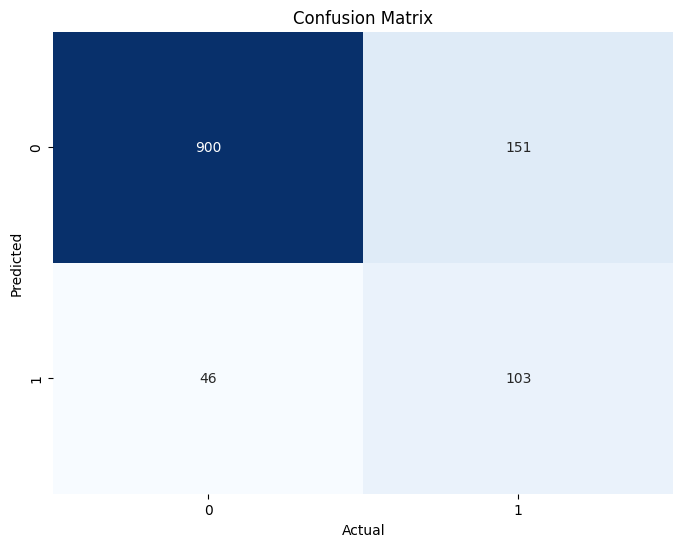

In [ ]:
import xgboost as xgb
xgb4 = xgb.XGBClassifier(n_estimators = 38)
xgb4.fit(X_train, y_train)
y_validation_pred = xgb4.predict(X_validation)
accuracy_validation = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {accuracy_validation * 100:.2f}%")

# Make predictions on the test data
y_test_pred = xgb4.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")
# Calculate precision
precision = precision_score(y_test, y_test_pred)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_test_pred)
print(f"Recall: {recall:.2f}")

# Calculate f1_score

f1score = f1_score(y_test, y_test_pred)
print(f"F1-Score: {f1score:.2f}")

#Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred).T

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()